In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install scikit-image

In [ ]:
!pip install matplotlib

In [ ]:
!pip install PIL

In [2]:
import skimage as ski
from skimage.morphology import medial_axis
from skimage import measure

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from random import uniform
from scipy import ndimage

skel shape: (200, 200), distance shape: (200, 200)
maximum th: 9.219544457292887, minimum th: 0.0


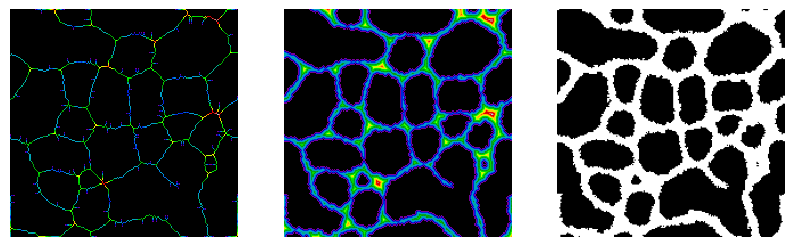

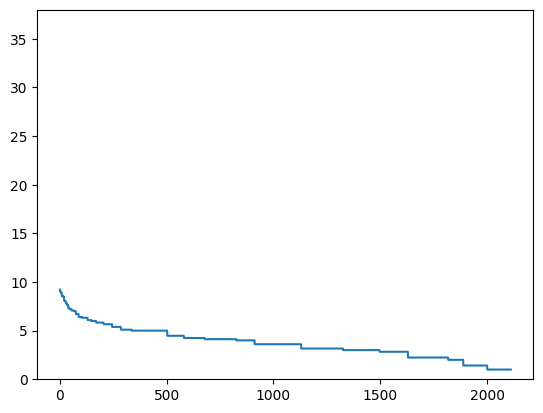

In [4]:
# Define the filename of the image
filename = '/content/drive/MyDrive/m34_ws/Snap_4.0_1.0_500.0_0.25_1.0_0.3_0.3.png'

# Read image data with PIL  (Python Imaging Library)
image = Image.open(filename)

# Turn image to array
image = np.array(image)

# Binarise the image and turn in 2d
image = image[:,:,0] == 0

# Keep a copy of the original image for plotting
original_image = image

# Smoth the edges of the structures
for i in range(0, 10):
    image = ski.morphology.erosion(image)
    # Dilate one pixel
    image = ski.morphology.dilation(image)

# Compute the medial axis of the image
skel, distance =  medial_axis(image, return_distance=True)
print(f'skel shape: {skel.shape}, distance shape: {distance.shape}')
# Multiply the distance image by the skel image to keep only the distances (local width) on the skeleton
dist_on_skel = distance * skel

# Print the maximum and minimum values of the dist_on_skel image
print(f'maximum th: {np.max(dist_on_skel)}, minimum th: {np.min(dist_on_skel)}')

# Plot the skel and the distances map

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))
ax1.imshow(dist_on_skel, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax1.axis('off')
ax2.imshow(distance, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax2.axis('off')
# Plot the image in ax3
ax3.imshow(original_image, cmap=plt.cm.gray)
ax3.axis('off')
plt.show()
# Sort the pixels of the dist_on_skel image by value
sort_px_list = np.sort(dist_on_skel.ravel())
# Keep only the non zero values
nonzero_pixels = sort_px_list[sort_px_list > 0]
# Invert the list to have the highest values first
nonzero_pixels = nonzero_pixels[::-1]
# Plot nonzero_pixels clamping y axis to 0-38
plt.plot(nonzero_pixels)
plt.ylim(0, 38)
plt.show()




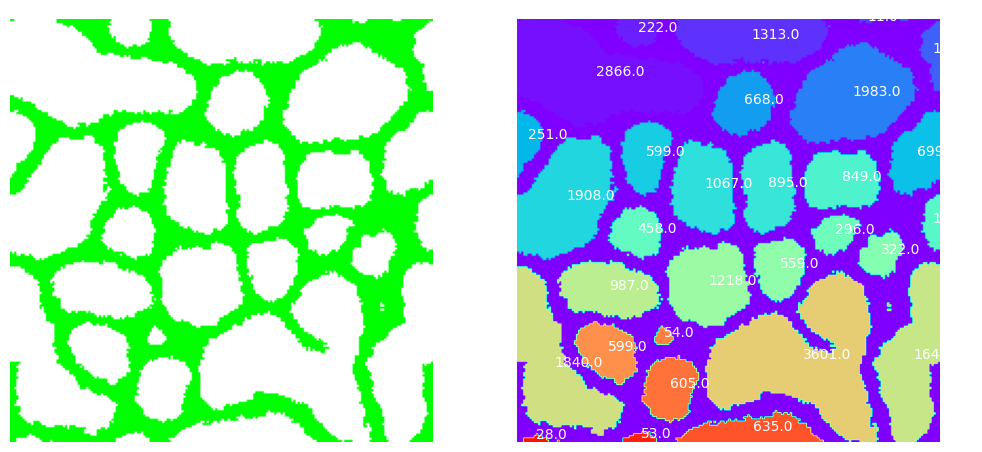

Number of connected domains: 47


In [5]:
# Find connected components in the image

# Define the filename of the image
filename = '/content/drive/MyDrive/m34_ws/Snap_4.0_1.0_500.0_0.25_1.0_0.3_0.3.png'

# Read image data with PIL  (Python Imaging Library)
image = Image.open(filename)

# Turn image to array
image = np.array(image)

# Binarise the image and turn in 2d
binary_image = image[:,:,0] > 0

# Keep a copy of the original image for plotting
original_image = image

# Label the connected components
labeled_image, num_labels = ndimage.label(binary_image)

# Get properties of labeled regions
regions = measure.regionprops(labeled_image)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

# Display the original image
ax1.imshow(original_image, cmap='gray')
# Display the labeled image
ax2.imshow(labeled_image, cmap='rainbow')
ax1.axis('off')
ax2.axis('off')


# Print the area of each domain on the image
for i, region in enumerate(regions, start=1):
    # Get the coordinates of the centroid of the region
    y, x = region.centroid
    # Draw the area of the domain on the image
    if region.area > 10:
       ax2.text(x, y, str(region.area), color='white')

plt.show()

# Print the number of connected domains
print(f'Number of connected domains: {num_labels}')